In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
aaxis_df=pd.read_csv('AXISBANK.NS.csv')


aaxis_df[['Open', 'High','Low', 'Close','Adj Close','Volume']] = aaxis_df[['Open', 'High','Low', 'Close','Adj Close','Volume']].apply(pd.to_numeric, errors='coerce')


aaxis_df["Open"].fillna(value=aaxis_df["Open"].mean(), inplace=True)
aaxis_df["High"].fillna(value=aaxis_df["High"].mean(), inplace=True)
aaxis_df["Low"].fillna(value=aaxis_df["Low"].mean(), inplace=True)
aaxis_df["Close"].fillna(value=aaxis_df["Close"].mean(), inplace=True)
aaxis_df["Adj Close"].fillna(value=aaxis_df["Adj Close"].mean(), inplace=True)
aaxis_df["Volume"].fillna(value=aaxis_df["Volume"].mean(), inplace=True)

date_column=aaxis_df["Date"]



C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


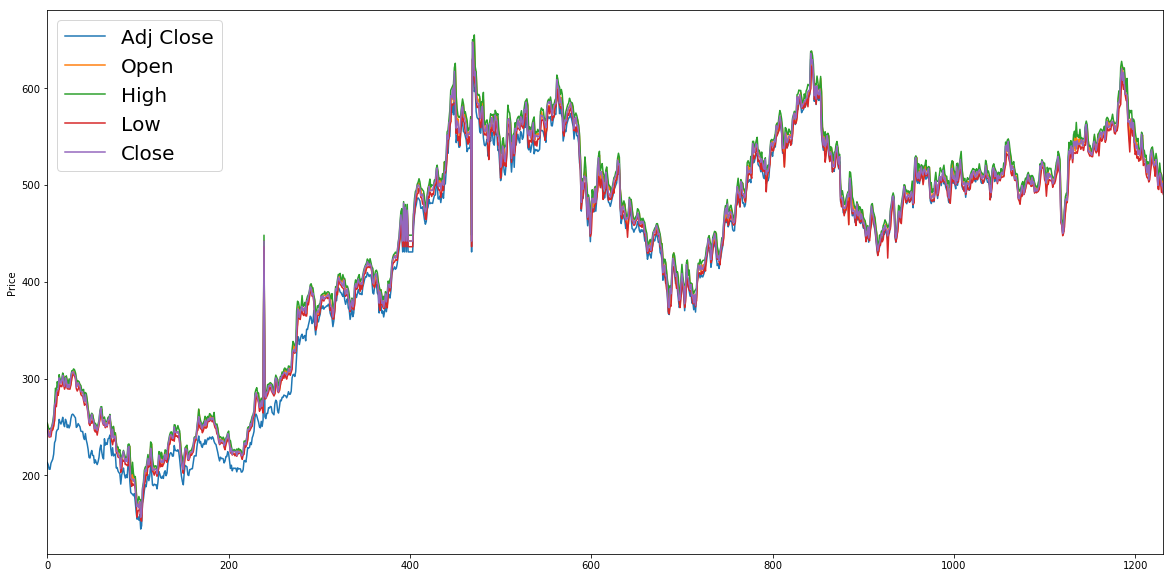

In [3]:
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

#Visualization
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

#aaxis_df.set_index("Date", inplace = True)
aaxis_df[['Adj Close','Open','High','Low','Close']].plot(figsize=(20,10), linewidth=1.5)

plt.legend(loc=2, prop={'size':20})
plt.ylabel('Price')

In [4]:
#Moving Average  
def MA(df, n):  
    name = 'SMA_' + str(n)
    #MA = pd.Series(pd.rolling_mean(df['Close'], n), name = 'SMA_' + str(n))  
    #df = df.join(MA)  
    df[name]=pd.rolling_mean(df['Adj Close'],n)
    return df

#Exponential Moving Average  
def EMA(df, n):
    name = 'EMA_' + str(n)
    #MA = pd.Series(pd.rolling_mean(df['Close'], n), name = 'SMA_' + str(n))  
    #df = df.join(MA)  
    df[name]=pd.ewma(df['Adj Close'], span = n, min_periods = n - 1)
    return df

In [5]:
for i in [30,40,50]:
    
    MA(aaxis_df,i)
    
for i in [30,40,50]:
    
    EMA(aaxis_df,i)


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).mean()
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=29,adjust=True,ignore_na=False).mean()
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarni

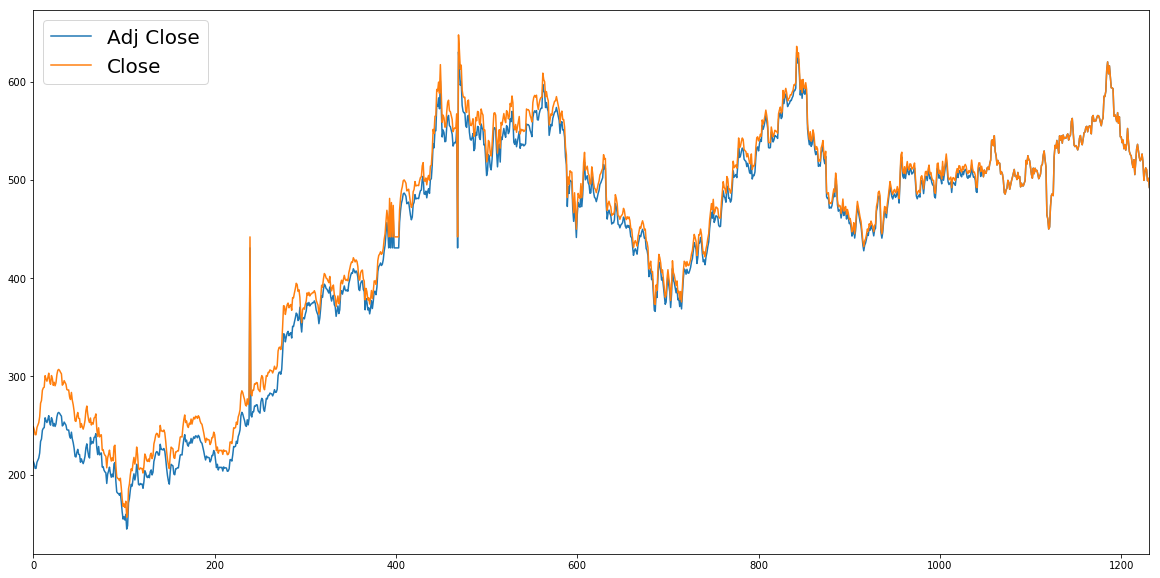

In [6]:
aaxis_df[['Adj Close', 'Close']].plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})

In [7]:
dates = np.array(aaxis_df["Date"])
#print(dates)
dates_check = dates[-30:]
dates = dates[:-30]

In [8]:
# define a new feature, HL_PCT
aaxis_df['HL_PCT'] = (aaxis_df['High'] - aaxis_df['Low'])/(aaxis_df['Low']*100)

# define a new feature percentage change
aaxis_df['PCT_CHNG'] = (aaxis_df['Close'] - aaxis_df['Open'])/(aaxis_df['Open']*100)


In [9]:

columns_main=['Adj Close', 'HL_PCT', 'PCT_CHNG', 'Volume' ,'SMA_30', 'SMA_40', 'SMA_50', 'EMA_30', 'EMA_40', 'EMA_50']
aaxis_df = aaxis_df[columns_main]

In [10]:
aaxis_df.fillna( value=-99999, inplace=True)
#aaxis_df.dropna(inplace=True)
aaxis_df.isnull().sum()

Adj Close    0
HL_PCT       0
PCT_CHNG     0
Volume       0
SMA_30       0
SMA_40       0
SMA_50       0
EMA_30       0
EMA_40       0
EMA_50       0
dtype: int64

In [11]:
# pick a forecast column
forecast_col = 'Adj Close'

# Chosing 30 days as number of forecast days
forecast_out = int(30)
print('length =',len(aaxis_df), "and forecast_out =", forecast_out)

length = 1232 and forecast_out = 30


In [12]:
# Creating label by shifting 'Adj. Close' according to 'forecast_out'
aaxis_df['label'] = aaxis_df[forecast_col].shift(-forecast_out)
print(aaxis_df.head(2))
print('\n')
# If we look at the tail, it consists of n(=forecast_out) rows with NAN in Label column 
print(aaxis_df.tail(2))

    Adj Close    HL_PCT  PCT_CHNG     Volume   SMA_30   SMA_40   SMA_50  \
0  213.306046  0.000241 -0.000175  6417705.0 -99999.0 -99999.0 -99999.0   
1  210.853775  0.000264 -0.000088  6484050.0 -99999.0 -99999.0 -99999.0   

    EMA_30   EMA_40   EMA_50       label  
0 -99999.0 -99999.0 -99999.0  260.756927  
1 -99999.0 -99999.0 -99999.0  259.453613  


       Adj Close    HL_PCT  PCT_CHNG     Volume      SMA_30      SMA_40  \
1230  501.549988  0.000249  0.000153  6053789.0  523.089999  532.937501   
1231  492.250000  0.000291 -0.000243  6047813.0  521.570000  530.423751   

          SMA_50      EMA_30      EMA_40      EMA_50  label  
1230  546.526999  524.501628  529.505216  532.870408    NaN  
1231  544.667999  522.420878  527.687889  531.277450    NaN  


In [13]:
# Define features Matrix X by excluding the label column which we just created 
X = np.array(aaxis_df.drop(['label'], 1))

# Using a feature in sklearn, preposessing to scale features
X = preprocessing.scale(X)
print(X[1,:])

[-1.78607885 -0.13905205 -0.44873919 -0.32565964 -6.4405131  -5.5306745
 -4.91345087 -6.55723202 -5.6053204  -4.96646649]


In [14]:
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]
print ("Length of X_forecast_out:", len(X_forecast_out), "& Length of X :", len(X))

Length of X_forecast_out: 30 & Length of X : 1202


In [15]:
# A good test is to make sure length of X and y are identical
y = np.array(aaxis_df['label'])
y = y[:-forecast_out]
print('Length of y: ',len(y))

Length of y:  1202


In [16]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

print('length of X_train and x_test: ', len(X_train), len(X_test))

length of X_train and x_test:  961 241


In [17]:
# Train
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train,y_train)
# Test
accuracy = clf.score(X_test, y_test)
print("Accuracy of Linear Regression: ", accuracy)

Accuracy of Linear Regression:  0.96897053742


In [18]:
forecast_prediction = clf.predict(X_forecast_out)
print(forecast_prediction)

[ 489.0231904  488.1408875  484.4948395  477.6572328  487.5702942
  488.6932007  486.0735992  466.6969453  471.641156   466.7323975
  479.6331054  474.5832124  466.2075165  491.8401765  490.7485993
  556.0392882  545.3018984  514.5957522  474.190381   492.20235
  491.6778382  496.130777   501.2380493  489.4937348  500.9539916
  529.3450225  495.7593598  506.760028   496.2321684  509.8333616]


In [19]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = aaxis_df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = forecast_prediction
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1232 entries, 2013-04-04 to 2018-04-04
Data columns (total 2 columns):
ClosePrice    1202 non-null float64
Forecast      30 non-null float64
dtypes: float64(2)
memory usage: 28.9+ KB


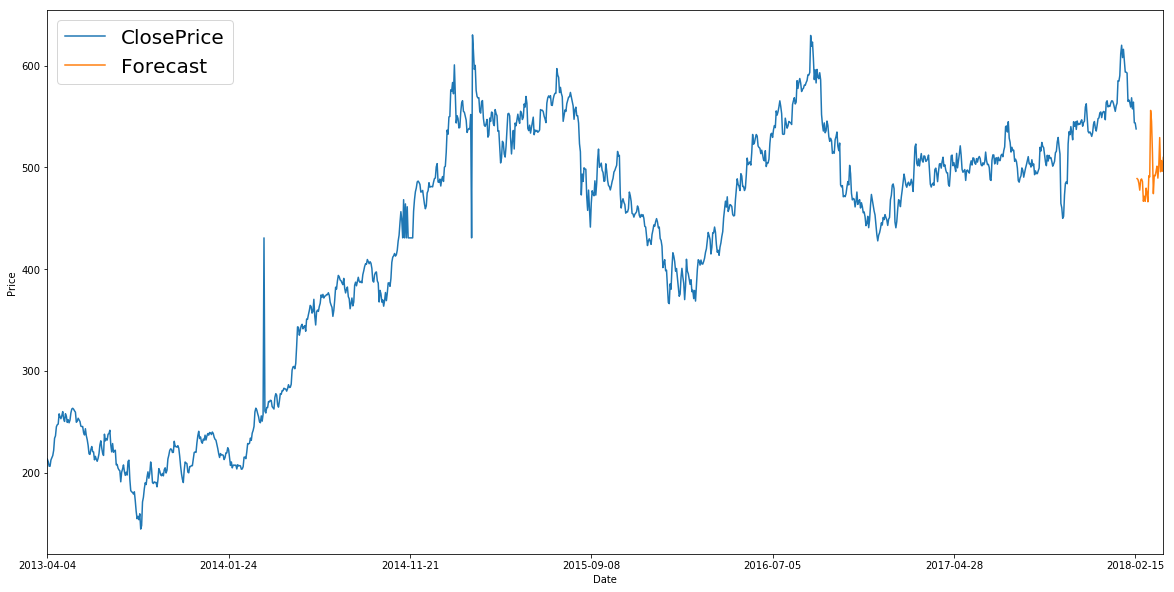

In [20]:
#Plot the results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')

In [21]:
a=result['ClosePrice'].iloc[-31]
b=result['Forecast'].iloc[-1]
ret=((b-a)/a)*100
ret

-5.2090017012476322

In [22]:
sub=pd.read_csv('submission.csv')
sub

,Date,Symbol,Return
0,20180516,TCS.NS,13.03
1,20180516,WIPRO.NS,0.10
2,20180516,AXISBANK.NS,-20.90
3,20180516,HCLTECH.NS,2.50
4,20180516,HDFCBANK.NS,3.03
5,20180516,ICICIBANK.NS,0.10
6,20180516,INDUSINDBK.NS,-7.90
7,20180516,INFY.NS,6.00
8,20180516,KOTAKBANK.NS,3.03
9,20180516,SBIN.NS,0.10


In [23]:
sub=pd.read_csv('submission.csv')
sub.iloc[2,2]
for i in range(12):
    if sub.loc[i]['Symbol']=='AXISBANK.NS':
        sub.iloc[i,2]="{0:.2f}".format(ret)


In [24]:
sub.to_csv('submission.csv',index=False)
sub

,Date,Symbol,Return
0,20180516,TCS.NS,13.03
1,20180516,WIPRO.NS,0.1
2,20180516,AXISBANK.NS,-5.21
3,20180516,HCLTECH.NS,2.5
4,20180516,HDFCBANK.NS,3.03
5,20180516,ICICIBANK.NS,0.1
6,20180516,INDUSINDBK.NS,-7.9
7,20180516,INFY.NS,6
8,20180516,KOTAKBANK.NS,3.03
9,20180516,SBIN.NS,0.1
